<a href="https://colab.research.google.com/github/Kassandracw8/Adult-Income-/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/Adult Income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB




*   There is not any Unnamed column in data set.
*   Income is listed as object. I wonder if it should be an int64.
*   All other data types are as they should be.





In [5]:
df.shape

(48842, 15)

There are 48,842 rows and 15 columns

## Duplicated Data

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [7]:
df.duplicated().sum()

52

There are 52 duplicate in the dataset which we will drop.

In [8]:
df = df.drop_duplicates()

In [9]:
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


## Missing Values

In [10]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64



*   Interesting there doesn't seem to be any missing values.



# Inspect Column Datypes for Errors

In [11]:
data_types = df.dtypes
data_types

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [12]:
str_cols = data_types[data_types=='object'].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [13]:
for col in str_cols:
   print(f'- {col}:')
   print(df[col].value_counts(dropna=False))
   print("\n\n")

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



- marital-status:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- occupation:
Prof-specialty       6165
Craft-rep



*   There look like that there is some missing information 




In [14]:
df.income.value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64



*   I wanted to take a close look at the income data to see why it is showing as object.
* It looks like it coming from the greater and equal to sign.



In [15]:
df.describe(include="number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000




*   I do see something out of ordinary and that is in the hours-per-week. How would someone work 99 hours?


*   Also capital gain has max of 99999.

*   Must invesiagte these values further.







In [16]:
cap_gain = df['capital-gain'] == 99999.000000
df[cap_gain]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [17]:
over_hours = df['hours-per-week'] == 99.000000
df[over_hours]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
901,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
1121,31,Local-gov,378426,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K
1156,48,?,117054,5th-6th,3,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K
1649,52,Private,254680,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47273,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
47962,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K




*   I don't know if i should drop all these columns. It is only 137 rows out of 48,888. the age is low.


*   There is mulituple indexs for both odd values. I do not know if I should drop the values. They need to be explored more.




# Data Exploration and Visualization

In [18]:
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [19]:
for col in str_cols:
   print(f'- {col}:')
   print(df[col].value_counts(dropna=False))
   print("\n\n")

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



- marital-status:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- occupation:
Prof-specialty       6165
Craft-rep

**Native,Country, Occupation, Workclass**


*   has unknown values represented by ?

**Education**


*   9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
 Create Elementary object for 1st-4th, 5th-6th, 7th-8th

**Marital Status**


*  Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married

**Workclass**



*   Self-emp-not-inc, Self-emp-inc comes under category self employee
*   Local-gov,State-gov,Federal-gov comes under category goverment emloyees














In [20]:
edit_cols = ['native-country','occupation','workclass']

for col in edit_cols:
    df.loc[df[col] == '?', col] = 'unknown'

In [21]:
for col in edit_cols:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in native-country: 0
? in occupation: 0
? in workclass: 0


In [22]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

df['education'].value_counts()


HS-grad              20382
Some-college         10863
Bachelors             8013
Masters               2656
Assoc-voc             2060
elementary_school     1706
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               81
Name: education, dtype: int64

In [23]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital-status'].value_counts()

Married          23030
Never-married    16082
Separated         8160
Widowed           1518
Name: marital-status, dtype: int64

In [24]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()


Private           33860
Govt_employees     6549
Self_employed      5555
unknown            2795
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

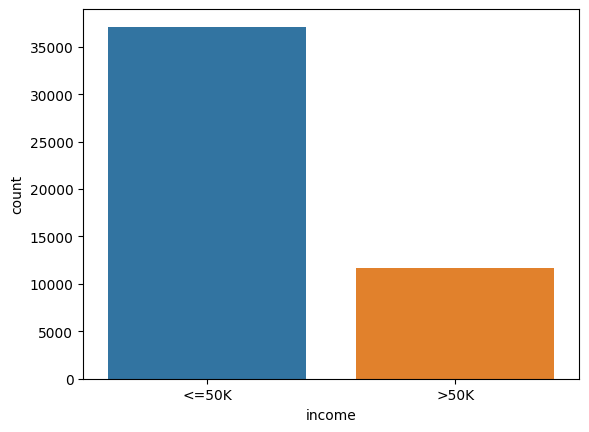

In [25]:
ax = sns.countplot(data = df, x = 'income');




*   This graph shows a significance difference between greater than or eaqual to 50,000 then the adult that make 50,0000 and less.
*   I wonder if the income has correlation with the type of job.


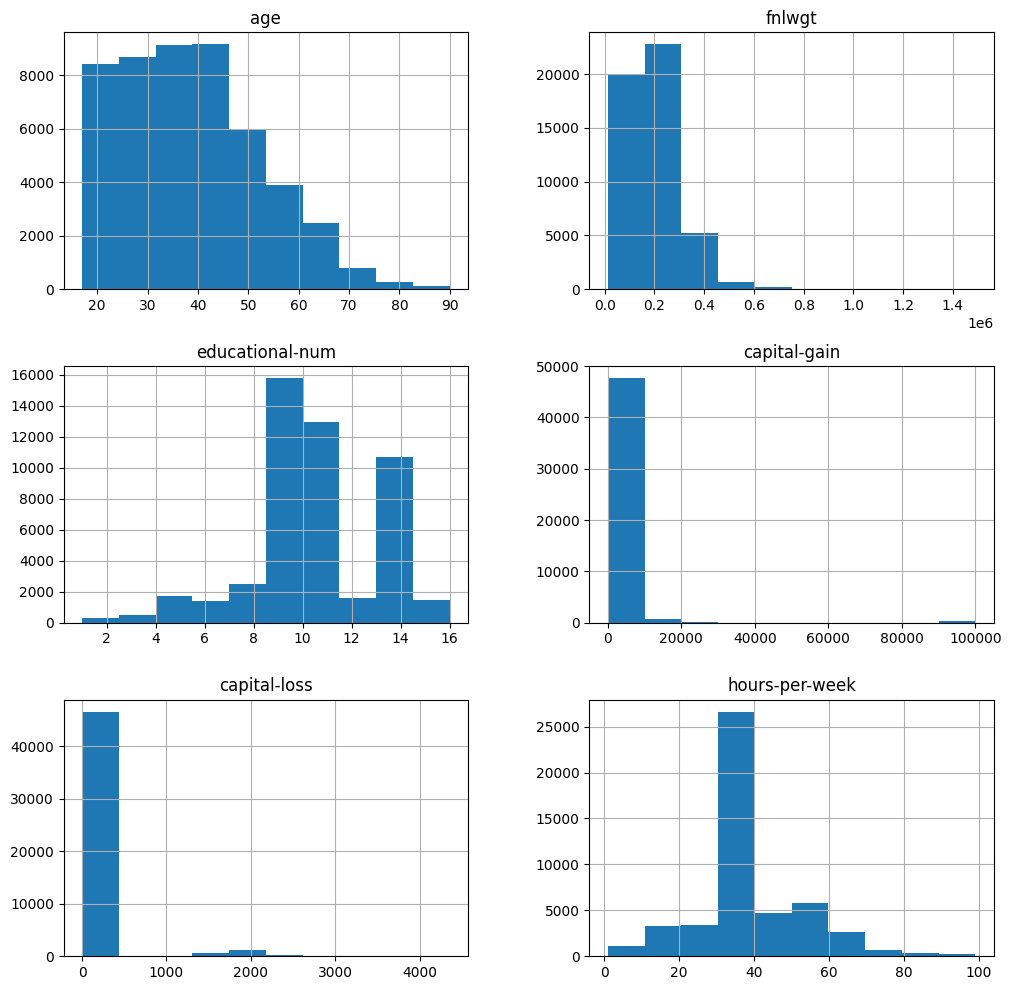

In [26]:
df[list(num_col.index)].hist(figsize = (12,12));



*   age: In our dataset People from age group of 18 to 50 can be observed.
*   hours per week: Generally people can be seen working for 30 hours to 40 hours per week.
*    education: people above 8th grade are more in our dataset.
Our dataset is highly skewed and we should consider scaling it for better performance of our models.




Let's explore more for people having capital loss and capital gain greater than zero.

In [27]:
capital_loss_df = df[df['capital-loss']>0]
capital_gain_df = df[df['capital-gain']>0]
print(capital_loss_df)
print(capital_gain_df)
print(f"Percentage of people having capital gain greater than median value: {(df.loc[df['capital-gain'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(df.loc[df['capital-loss'] > 0,:].shape[0] / df.shape[0])*1}%")

       age       workclass  fnlwgt     education  educational-num  \
52      21         Private  214399  Some-college               10   
82      24         Private   83141  Some-college               10   
129     41         Private  239296       Masters               14   
143     43   Self_employed  214503       HS-grad                9   
154     40  Govt_employees   67874     Bachelors               13   
...    ...             ...     ...           ...              ...   
48722   53         Private  304504  Some-college               10   
48724   18         Private   41381       HS-grad                9   
48726   61         Private  190682       HS-grad                9   
48739   36         Private  237943     Bachelors               13   
48781   34         Private   60567       HS-grad                7   

      marital-status        occupation   relationship   race  gender  \
52     Never-married     Other-service      Own-child  White  Female   
82         Separated     Ot

Percentage of people having capital gain greater than median value: 8.2701%
Percentage of people having capital loss greater than median value: 0.0467%

In [28]:
capital_gain_0= df[df['capital-loss'] > 0].loc[:,['capital-loss','capital-gain']].sample(10)

capital_loss_0 = df[df['capital-gain'] > 0].loc[:,['capital-loss','capital-gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

       capital-loss  capital-gain
28330          1977             0
45678          1902             0
37428          2415             0
10107          2238             0
2708           1887             0
       capital-loss  capital-gain
27245             0         99999
40447             0         15024
14073             0           594
46408             0         10520
47510             0         14344


Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero
If capital.gain is zero there is possibility of capital loss being high or above zero.
If capital loss is zero there is possibility of capital.gain being high or above zero.
I know the column has outliers. I still don't know how to handle them. Myabe more digging into capital loss/gain.

In [29]:
df.loc[df['capital-gain'] > 0,:].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4035.000000,4.035000e+03,4035.000000,4035.000000,4035.0,4035.000000
mean,44.117720,1.870015e+05,11.064188,13061.665675,0.0,43.526146
std,13.370906,1.029421e+05,2.678916,22711.237412,0.0,12.466097
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.168110e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.749950e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.347725e+05,13.000000,13550.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000




*   Maximum value of capital gain is 99999 which is far above 75% quartile range.This is definitely an outlier. Lets try and understand more about this maximum value of 99999.



In [30]:
print(f"Number of observations having capital gain of 99999:{df.loc[df['capital-gain'] == 99999,:].shape}")
print(f"Income counts: {df.loc[df['capital-gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(244, 15)
Income counts: >50K    244
Name: income, dtype: int64


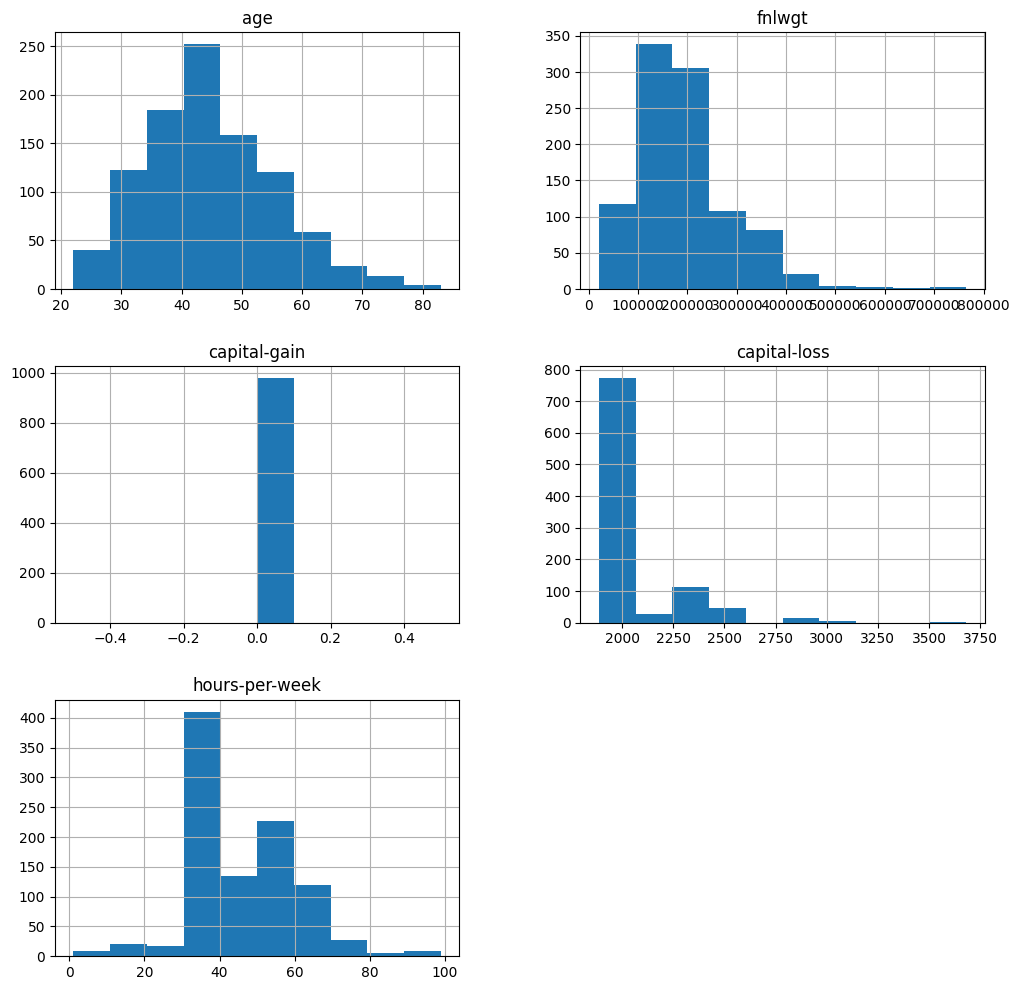

In [62]:
df[(df['capital-loss'] >= 1871) & (df['income'] == '>50K')].hist(figsize = (12,12));



*   Education and hours per week are significantaly high.
*   Thee are some other factors affectiong their loss other than the above.



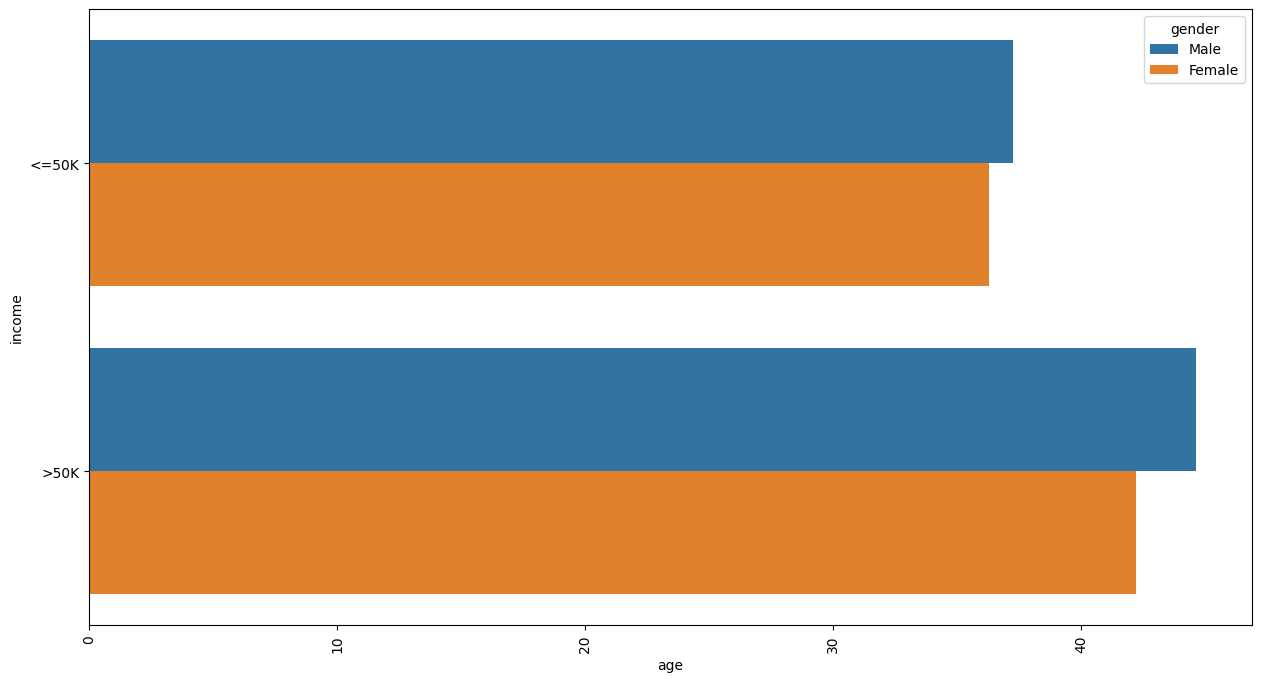

In [31]:
plt.figure(figsize=(15, 8))
sns.barplot(x="age", y="income", hue='gender', data=df, errorbar=None)
plt.xticks(rotation=90);




*   It looks like the male gender does make more the female gender in both catergories.




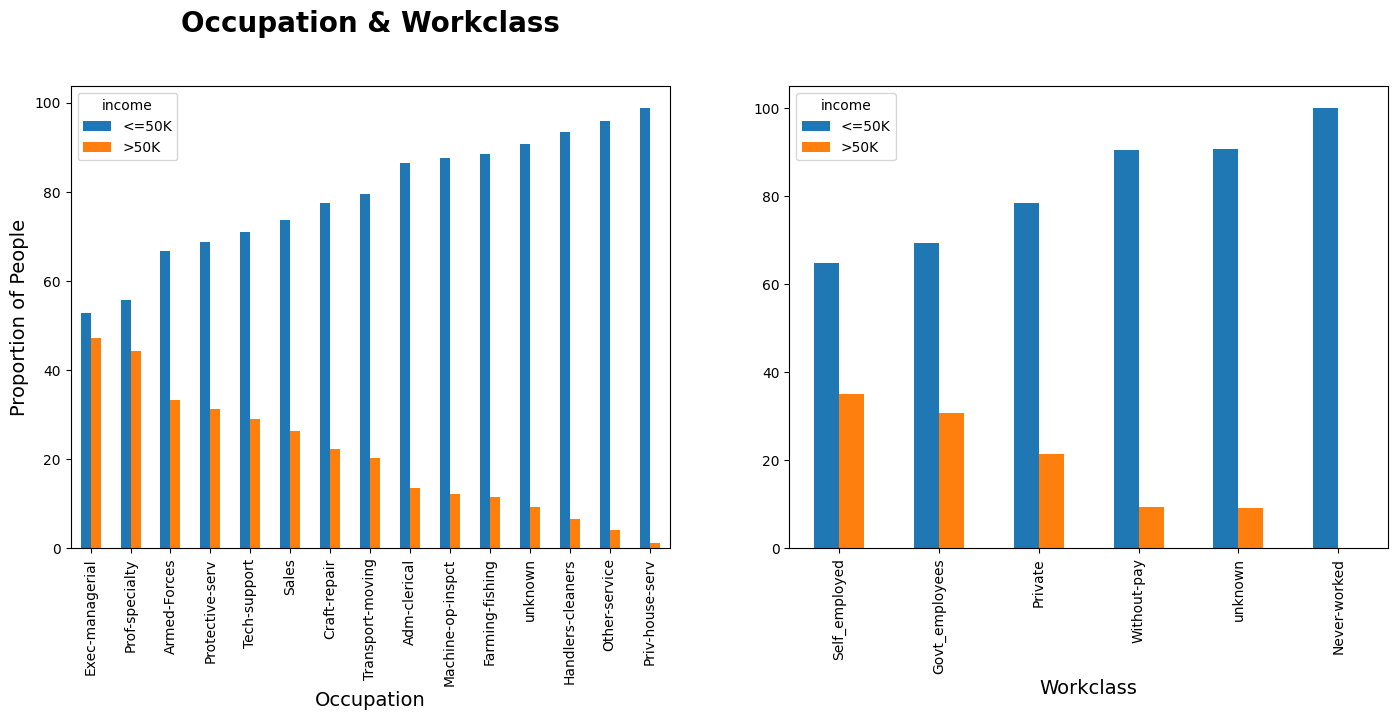

In [66]:
table_occu = pd.crosstab(df['occupation'], df['income'])
table_workclass = pd.crosstab(df['workclass'], df['income'])
table_edu = pd.crosstab(df['education'], df['income'])
table_marital = pd.crosstab(df['marital-status'], df['income'])
table_race = pd.crosstab(df['race'], df['income'])
table_sex = pd.crosstab(df['gender'], df['income'])
table_country = pd.crosstab(df['native-country'], df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
ax.set_title('Occupation & Workclass', 
             fontsize = 20, 
             fontweight = 'bold',
             y=1.1);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);




1.   People having degree doctorate,prof-school,masters are making salary more than 50K.
2. Out of all the workclass only 59% self employed people are making salary more than 50K.
3. If I check by occupation, Proportion of people making salary less than 50K is higher




Let's find correlation between numerical fetatures

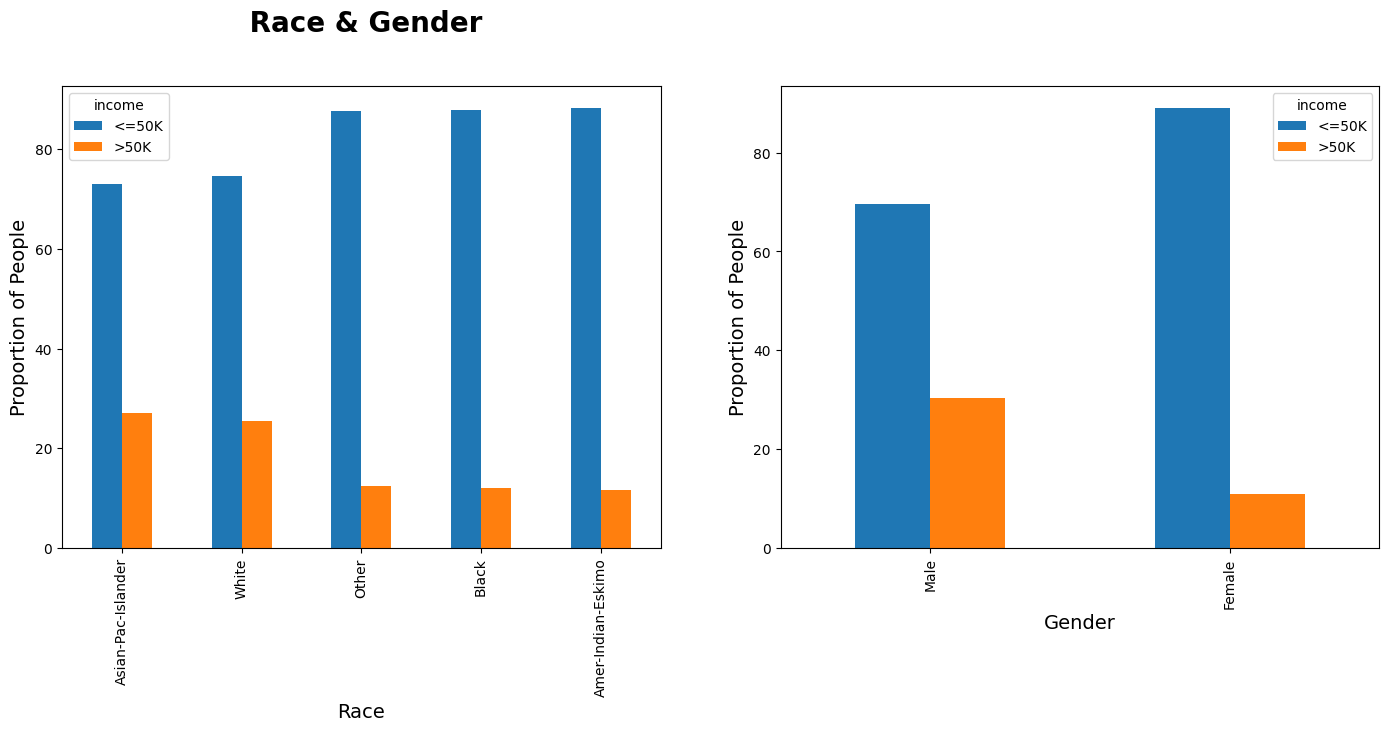

In [33]:
table_occu = pd.crosstab(df['occupation'], df['income'])
table_workclass = pd.crosstab(df['workclass'], df['income'])
table_edu = pd.crosstab(df['education'], df['income'])
table_marital = pd.crosstab(df['marital-status'], df['income'])
table_race = pd.crosstab(df['race'], df['income'])
table_sex = pd.crosstab(df['gender'], df['income'])
table_country = pd.crosstab(df['native-country'], df['income'])


fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
ax.set_title(' Race & Gender', 
             fontsize = 20, 
             fontweight = 'bold',
             y=1.1);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Gender',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

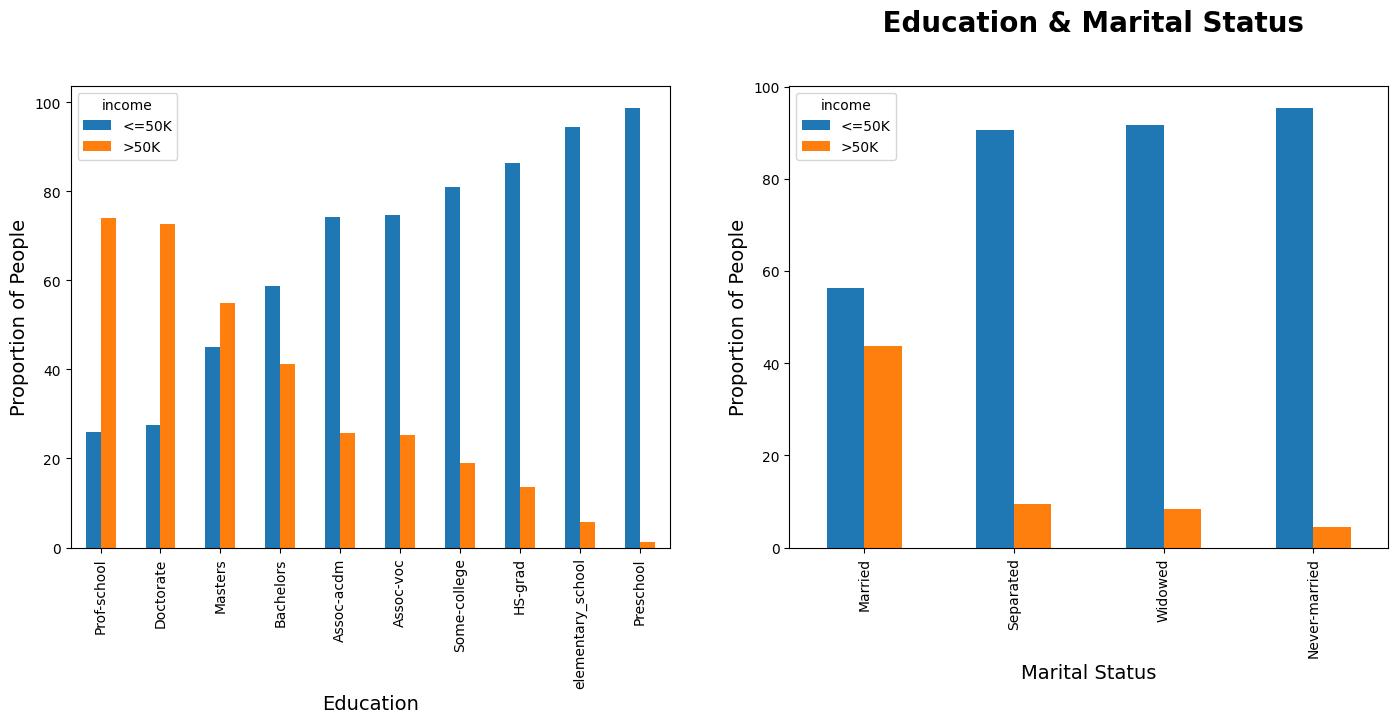

In [34]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
ax.set_title(' Education & Marital Status', 
             fontsize = 20, 
             fontweight = 'bold',
             y=1.1);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

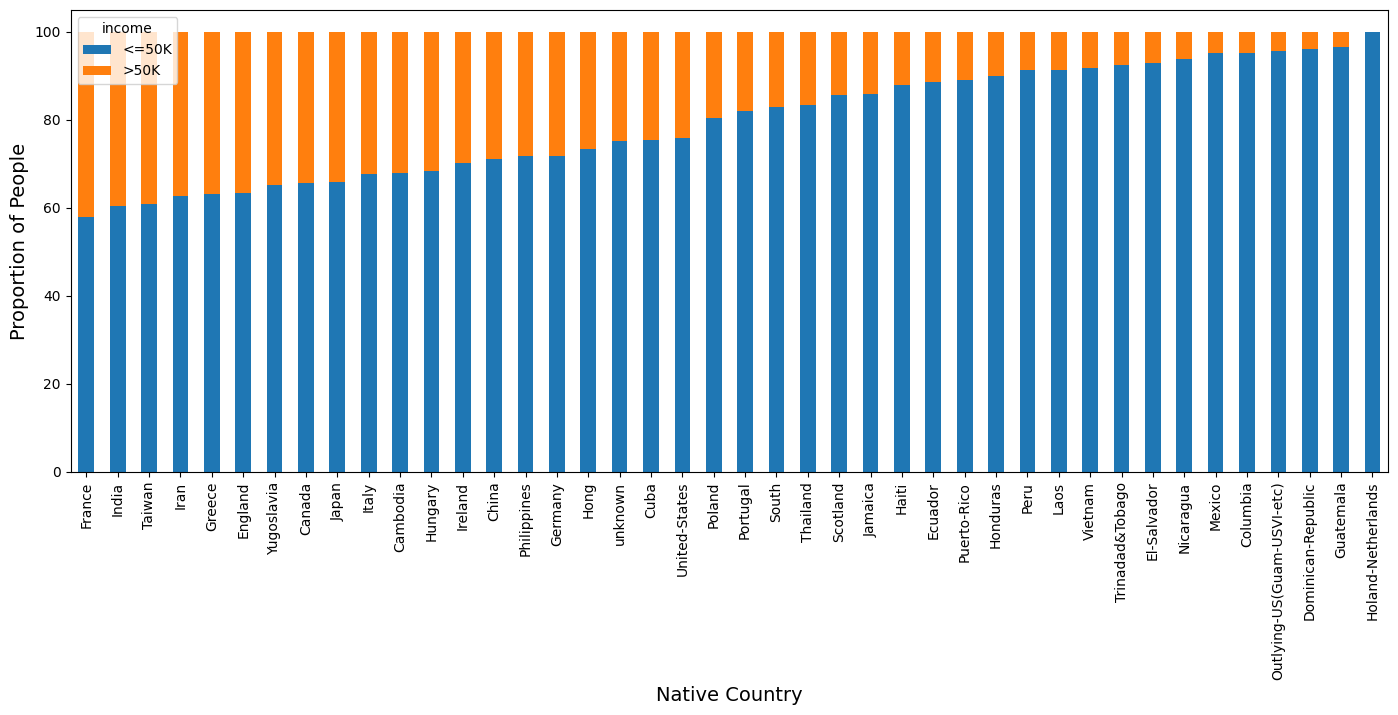

In [67]:
table_country = pd.crosstab(df['native-country'], df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary

1. Gender:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K
2. Race:- White and asain-pac-Islander earn salary more than 50K
3. Marital status :- 41% of married people seem to earn salary greater than 50K.

# Preparing Data for ML Algorithms

In [35]:
print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['relationship','educational-num']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [36]:
hrs_per_week = df[df['hours-per-week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 137




*   It won't be a good idea to delete all the outliers because if thats's the case with test data too we might get false results.



In [37]:
print("Number of observation before removing:",df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (48790, 13)
Number of observation after removing: (48736, 13)


In [38]:
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (48736, 13)
Number of observation after removing: (48492, 13)


In [39]:
num_col_new = ['age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital-status', 'occupation',
               'race', 'gender', 'native-country', 'income']

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df[num_col_new]),columns = num_col_new).head(3)

,age,capital-gain,capital-loss,hours-per-week,fnlwgt
0,0.111111,0.0,0.0,0.397959,0.145129
1,0.291667,0.0,0.0,0.500000,0.052451
2,0.152778,0.0,0.0,0.397959,0.219649


In [41]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [42]:
num_df = pipeline.fit_transform(df)
num_df.shape

(48492, 5)

In [43]:
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','gender_Male','income_>50K']

In [44]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(df)
cat_df.shape

(48492, 81)

In [45]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [46]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (48147, 87)


# Train and Fine Tuning on the model

In [47]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [50]:
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()

In [51]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging']

In [52]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging'}

In [53]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)    

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 82.9775%
Null Accuracy: 22.8878%
Confusion Matrix
[[1429 1326]
 [ 723 8559]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 82.9775%
Recall Score: 92.2107%
Specificity Score: 51.8693%
False Positive Rate: 48.1307%
Precision Score: 86.5857%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.52      0.58      2755
           1       0.87      0.92      0.89      9282

    accuracy                           0.83     12037
   macro avg       0.76      0.72      0.74     12037
weighted avg       0.82      0.83      0.82     12037

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTr

In this case, we can see that all of the chosen algorithms are skillful, achieving a classification accuracy above 75.2%. We can see that the ensemble decision tree algorithms perform the best with perhaps stochastic gradient boosting performing the best with a classification accuracy of about 86.3%

In [54]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
LogisticRegression,0.829775
SVC,0.828279
Adaboost,0.826701
KNN,0.810584
RandomForest,0.809753
Bagging,0.792141
DecisionTree,0.757082


In [55]:
models_new = {clf_logreg:'LogisticRegression',        
              clf_forest: 'RandomForest',
              clf_ada: 'Adaboost',
              clf_bagging: 'Bagging'}

classifiers_new = models_new.values()

In [ ]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

In [57]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
LogisticRegression,0.827942
Adaboost,0.826142
RandomForest,0.810994
Bagging,0.792384


In [58]:
param_grid_logreg = {'C':[0.0001,0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
param_grid_rf = {'n_estimators' : [50,60],
               'max_depth': range(5,16,2)}
param_grid_ada = {'n_estimators':[50,60,70]}
param_grid_bagging = {'n_estimators':[50,60,70]}

In [59]:
def feature_selection(model,X_train,y_train):
    rfe_model = RFE(model)
    rfe_model = rfe_model.fit(X_train,y_train)
    X_train_cols = list(X_train.columns[rfe_model.support_])
    X_train_new = X_train[X_train_cols]
    return X_train_new

def grid(model,parameters,X_train_new):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, return_train_score = False,
                        scoring = 'accuracy')
    grid.fit(X_train_new,y_train)
    return grid.best_score_, grid.best_estimator_

def main(model,X_train,y_train,parameters):
    X_train_modi = feature_selection(model,X_train,y_train)
    grid_best_score,grid_best_params = grid(model,parameters,X_train_modi)
    return grid_best_score,grid_best_params,X_train_modi
    

In [ ]:
grid_best_score_logreg, grid_best_params_logreg , X_train_modi_logreg = main(clf_logreg,X_train,y_train,param_grid_logreg)
grid_best_score_rf, grid_best_params_rf , X_train_modi_rf = main(clf_forest,X_train,y_train,param_grid_rf)
grid_best_score_ab, grid_best_params_ab , X_train_modi_ab = main(clf_ada,X_train,y_train,param_grid_ada)
grid_best_score_bc, grid_best_params_bc , X_train_modi_bc = main(clf_ada,X_train,y_train,param_grid_bagging)

In [61]:
pd.DataFrame([grid_best_score_logreg, grid_best_score_rf,grid_best_score_ab,grid_best_score_bc],
             index = ['LogisticRegression','RandomForest','AdaBoost','Bagging'],
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score',ascending  = False)

,Accuracy Score
LogisticRegression,0.827638
RandomForest,0.827222
AdaBoost,0.826059
Bagging,0.826059


# Overview



Ultimately the best performers were random forest. Random Forest
performed best when variable country wasn’t included. This is because the variable country
is biased. 

It looks like there are many factors that come in to making 50,000 weather your male or female, what time of education you have, and even your race. 
If we made college more affordable there might be chance for some races to recieved a high education as well.

As for the pay gap between men and women. The solutions include raising the minimum wage, promoting transparent pay practices, increasing workplace unionization, and providing robust paid family and medical leave for workers. Making these changes at the individual, company, state, and national level could go a long way towards achieving equal pay for equal work.
